# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [93]:
# Import all necessary libraries for data manipulation, data visualization and statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [94]:
# Creating a dataframe populated with hotel bookings' data
df = pd.read_csv("data/hotel_bookings.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

# Short Overview


_Considering the vast amount of findings, I chose to present them in this section as concisely as possible, using marketing's concept of customer persona(the character clearly representing the set of the audience). Below you can get familiar with description of typical 'canceler' and the person who fulfills the booking_

### Disclaimer: all personal details of persons decribed below are imaginary and are added for text's comprehensibility's and descriptiveness's sakes only

_**Bold text** emphasizes key points which forms the persona_

## Typical 'Canceler'
John Gordon is the 23 years old fresh graduate who is dreaming about amazing, but still so remote summer vacation journey. He **recently discovered about the hotel** of our analysis, **surfing the Internet**,  and **booked the room online** in **several months before arrival**, making **neither extra requests at all**, **nor call for car parking space**. The **booking's date is in the center of touristic season**, **in the middle of July**. Additionally, at the final web-page he opted **the meal plan of the second type** together with **the sixth type of room**. 


## Responsible Customer
Wanessa Goggins, the 32 years old housewife, who had **found out about the hotel several years ago from email sent to her by one of the online stores which she is the loyal customer of** and **had already stopped there** a couple of times, is looking for the place to stay with her family during the vacation trip this **winter in January**. She called our inn's reception to talk through details of future visit, such as **whether car parking space is available**, **whether special requests**, regarding her children, can be satisfied and when is **the closest date the room of type 7** is accessible to settle in. At the end of the phone call, the clerk clarified Mrs.Goggins about eating, the choice was already traditional for woman: **Meal Plan 3**.        

----------------------------------------------------------------------------------------------------------------------------------------------

## Now it is time to get familiar with details of analysis and the reasons of such characteristics of two individuals above

_At first, we verify data's consistency and integrity, then modify it so it fits our analysis's needs._

# Data Scanning and Transformation

In [95]:
display(df.describe(include='all'))
df.dtypes

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,35862.000000,35951.000000,35908.000000,35468.00000,35749,33683.000000,35104,35803.000000,35897.000000,35771.000000,35294.000000,34763,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27421,NaN,27234,NaN,NaN,NaN,NaN,22264,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.845017,0.105366,0.810209,2.20331,NaN,0.030698,NaN,85.276569,2017.820431,7.424031,15.605712,NaN,0.025666,0.023646,0.154458,103.418207,0.619343,NaN
std,NaN,0.518652,0.402871,0.870857,1.40989,NaN,0.172501,NaN,85.998845,0.383834,3.068277,8.743484,NaN,0.158140,0.370835,1.764805,35.057342,0.785849,NaN
min,NaN,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.00000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.00000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.00000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


Booking_ID                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space              float64
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                           object
dtype: object

In [96]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [97]:
# Fill NaN values of date-related columns with self-made error code(999 in this case) 
#to help Python to interpret unknown values correctly
#when creating separate date column of datetime type
df['arrival_year'] = df['arrival_year'].fillna(999)
df['arrival_month'] = df['arrival_month'].fillna(999)
df['arrival_date'] = df['arrival_date'].fillna(1) #to extract year_month later

In [98]:
# Changing 'required_car_parking_space', 'repeated_guest' and date's parts data type
df['arrival_date'] = df['arrival_date'].astype('int32').astype(str)
df['arrival_year'] = df['arrival_year'].astype('int32').astype(str)
df['arrival_month'] = df['arrival_month'].astype('int32').astype(str)

# These ones must be treated as categorical dictonomous(binary) variables, because they represent two possible outcomes: yes or no(displayed as 1 and 0 in this case)
df['required_car_parking_space'] = df['required_car_parking_space'].astype('object')
df['repeated_guest'] = df['repeated_guest'].astype('object')

In [99]:
#Creating a date column
df['date'] = df['arrival_date'] + '/' + df['arrival_month'] + '/' + df['arrival_year']
# Changing data type to work with it then
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Extract year and month of each booking to visualize it on the timescale later
df['year_month'] = df['date'].dt.strftime('%Y-%m')

We are good to proceed to the exploring relationships between various booking's attributes and its cancelation 

# Investigation of numerical attributes

_Point Biserial test fits this setting the most, considering investigation's variables' types_

In [100]:
# Make up the list of numerical attributes which will be investigated
numeric_atts_and_book = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',  'avg_price_per_room', 'no_of_special_requests', 'booking_status']

#Filter the original table, so only the columns of interest are left
df_pointbis_test = df[numeric_atts_and_book]

# For the Point Biserial test's requirements convert 'booking_status' values into integers representation
df_pointbis_test['booking_status'] = df_pointbis_test['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)
df_pointbis_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,0.0,2.0,3.0,5.0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,1.0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,211.0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,48.0,0.0,0.0,94.50,0.0,1


In [101]:
# Drop incomplete recordings to smoothen the test process and ensure integrity of results
df_pointbis_test_dropna = df_pointbis_test.dropna()
print(str(df_pointbis_test_dropna.shape[0])+' rows are left after dropping records contatining at least one null value')

32334 rows are left after dropping records contatining at least one null value


In [133]:
# All columns, except target variable 'booking_status'
point_variables = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',  'avg_price_per_room', 'no_of_special_requests']

# Performing the test for each attribute
for point in point_variables:
    x = scipy.stats.pointbiserialr(df_pointbis_test_dropna[point], df_pointbis_test_dropna['booking_status'])
    print('Pointbiserialr result  for df['+point+'] column =' +str(x))
    print("----------------------------------------------------------------------------------------------------------------------")

Pointbiserialr result  for df[no_of_adults] column =PointbiserialrResult(correlation=0.08981986559529292, pvalue=6.626671469481812e-59)
----------------------------------------------------------------------------------------------------------------------
Pointbiserialr result  for df[no_of_children] column =PointbiserialrResult(correlation=0.034749936257224265, pvalue=4.0976879023617496e-10)
----------------------------------------------------------------------------------------------------------------------
Pointbiserialr result  for df[no_of_weekend_nights] column =PointbiserialrResult(correlation=0.06159356203869044, pvalue=1.4729188789398227e-28)
----------------------------------------------------------------------------------------------------------------------
Pointbiserialr result  for df[no_of_week_nights] column =PointbiserialrResult(correlation=0.09213787480651242, pvalue=6.673576525908812e-62)
---------------------------------------------------------------------------------

Well, only few attributes turned out to contribute in the likelihood of reseravation's cancellation, but both of them will make a great impact into the formulating of the findings:

1. Firstly, as more special requests there initially are as less chance of cancellation becomes. **Requirable guests seem to be more determined and reliable. The relatioship between two variables can be defined as negative, weak and statistically significant.**

<br>

2. The cherry on the cake: number of days before the arrival date the booking was made. There is the moderate, statistically significant positive relationship observed here. **Clients, who booked the room earlier tend to stick to their choice more than once who like to reserve the hotel room spontaneously with little time before actual settlement.**

_Surprisingly, neither number of previous cancelations made by customer, nor amount of not canceled booking has anything to do with likelihood of future booking's annulment_

**_Now we proceed to the analogous testing of categorical variables of bookings available_**

# Chi-square test for categorical variables

In [132]:
# Make up the list of categorical attributes which will be investigated
cat_variables = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest']

# Perform the chi-square test* for each variable 
for cat in cat_variables:
    cross_booking = pd.crosstab(index=df['booking_status'], columns=df[cat])
    print('Chi-square result for df['+cat+'] column =' +str(scipy.stats.chi2_contingency(cross_booking, correction = True)))
    print("----------------------------------------------------------------------------------------------------------------------")

Chi-square result for df[type_of_meal_plan] column =(275.953597994834, 1.5898676971729578e-59, 3, array([[8.98129987e+03, 1.06972486e+03, 1.63766819e+00, 1.65633760e+03],
       [1.84397001e+04, 2.19627514e+03, 3.36233181e+00, 3.40066240e+03]]))
----------------------------------------------------------------------------------------------------------------------
Chi-square result for df[required_car_parking_space] column =(243.25660605161255, 7.667248592774522e-55, 1, array([[10676.86177003,   338.13822997],
       [21972.13822997,   695.86177003]]))
----------------------------------------------------------------------------------------------------------------------
Chi-square result for df[room_type_reserved] column =(56.24685131913228, 2.594884768537524e-10, 6, array([[8.92801026e+03, 2.17676390e+02, 1.96695533e+00, 1.91810928e+03,
        8.39234275e+01, 3.07828510e+02, 5.04851869e+01],
       [1.83059897e+04, 4.46323610e+02, 4.03304467e+00, 3.93289072e+03,
        1.72076572e+02, 

***_How to interpret the results:_**


Take a look at the second value in the list after 'column =': if it is higher than 0.05, the attribute does not impact the final likelihood of cancellation; if it is less than 0.05, then it affects cancellation's probability, as closer it is to zero as stronger the influence is.

### Thus, all of categorical attributes somehow contribute in the likelihood of booking's cancellation. Frequency table will show us exact values, which points out to the increased probability of withdrawal

           Frequency table of df[type_of_meal_plan]


booking_status
type_of_meal_plan booking_status                
Meal Plan 1       Not_Canceled          0.688487
                  Canceled              0.311513
Meal Plan 2       Not_Canceled          0.544397
                  Canceled              0.455603
Meal Plan 3       Not_Canceled          0.800000
                  Canceled              0.200000
Not Selected      Not_Canceled          0.668183
                  Canceled              0.331817

                                                      Heatmap of a frequency of df[type_of_meal_plan]


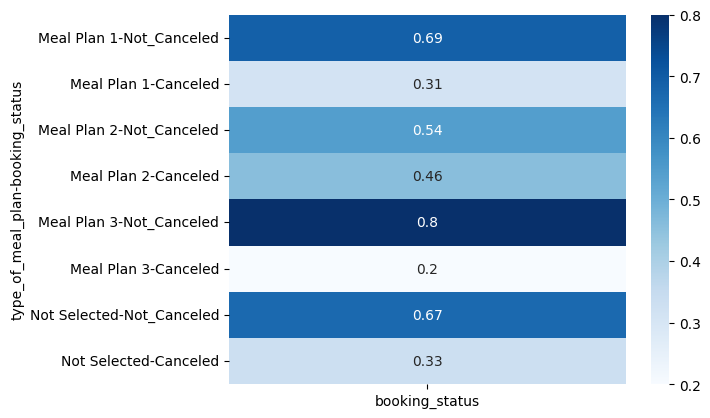

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[required_car_parking_space]


booking_status
required_car_parking_space booking_status                
0.0                        Not_Canceled          0.665870
                           Canceled              0.334130
1.0                        Not_Canceled          0.897485
                           Canceled              0.102515

                                                      Heatmap of a frequency of df[required_car_parking_space]


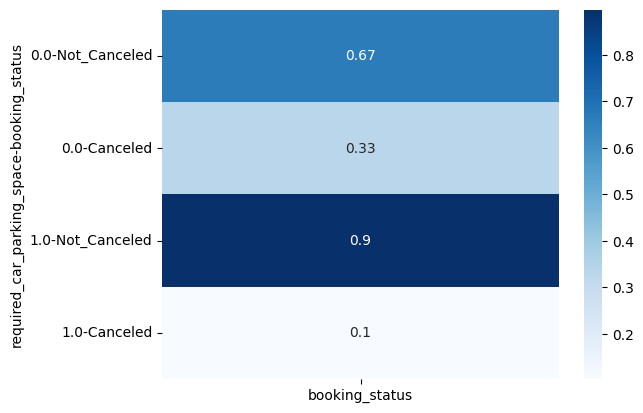

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[room_type_reserved]


booking_status
room_type_reserved booking_status                
Room_Type 1        Not_Canceled          0.677278
                   Canceled              0.322722
Room_Type 2        Not_Canceled          0.671687
                   Canceled              0.328313
Room_Type 3        Not_Canceled          0.666667
                   Canceled              0.333333
Room_Type 4        Not_Canceled          0.658520
                   Canceled              0.341480
Room_Type 5        Not_Canceled          0.726562
                   Canceled              0.273438
Room_Type 6        Not_Canceled          0.578275
                   Canceled              0.421725
Room_Type 7        Not_Canceled          0.772727
                   Canceled              0.227273

                                                      Heatmap of a frequency of df[room_type_reserved]


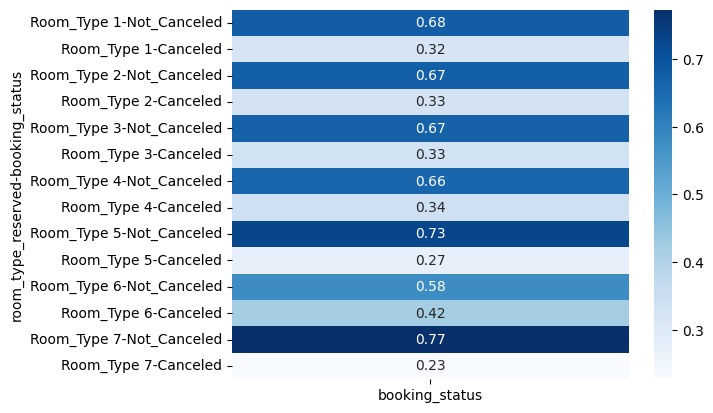

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[market_segment_type]


booking_status
market_segment_type booking_status                
Aviation            Not_Canceled          0.704918
                    Canceled              0.295082
Complementary       Not_Canceled          1.000000
Corporate           Not_Canceled          0.894081
                    Canceled              0.105919
Offline             Not_Canceled          0.699980
                    Canceled              0.300020
Online              Not_Canceled          0.634163
                    Canceled              0.365837

                                                      Heatmap of a frequency of df[market_segment_type]


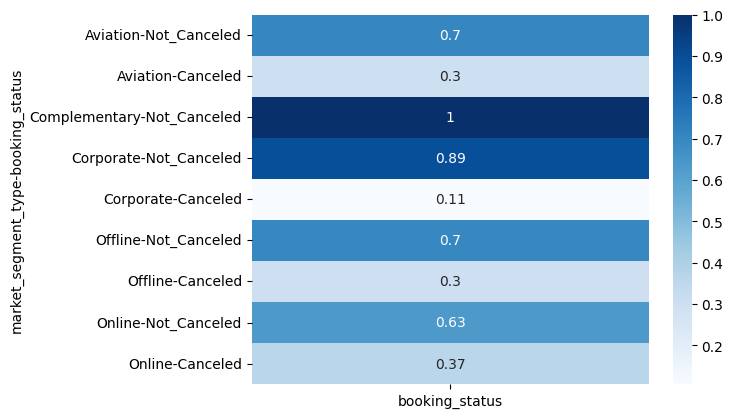

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[repeated_guest]


booking_status
repeated_guest booking_status                
0.0            Not_Canceled          0.663992
               Canceled              0.336008
1.0            Not_Canceled          0.982533
               Canceled              0.017467

                                                      Heatmap of a frequency of df[repeated_guest]


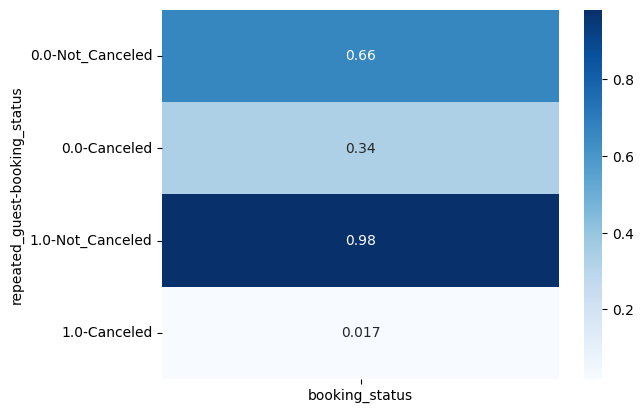

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------


In [104]:
for cat in cat_variables:
    Book_cancel_freq = df.groupby(cat)['booking_status'].value_counts(normalize=True).to_frame()
    read_heat_map = sns.heatmap(data=Book_cancel_freq, annot=True, cmap="Blues")
    print('           Frequency table of df['+cat+']')
    display(Book_cancel_freq)
    print('                                                      Heatmap of a frequency of df['+cat+']')
    plt.show()
    print("----------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------")

## The conclusions drawn, based on the statistical test performed:
1. Hotel must pay extra attention to those who **choose the second meal plan: they are very likely to abolish**. Whereas those who opt the third meal plan are apt to be the most reliable customers. Faster than all, it is **not a direct causation**, even though **certain correlation is visible**
<br>

2. The customers who **do not require car parking space** are **much more likely to cancel** the reservation
<br>

3. Overall, **there are no obvious indicators that certain room type chosen leads to cancellation**. Nonetheless, pure numerically individuals who selected room type 6 are more probable to cancel
<br>

4. Pretty expectable to see that **the people booked online have more fraction of cancellations**, a bit less but **still a big part of cancellations** is **among customers of offline and aviation market segment** type

<br>

5. The **first-time visitors are half more likely to cancel**, whereas **loyal customers hardly ever revoke the booking**
<br>

_*Odd enough, individuals of the complementary segment type did not make even a single cancellation, despite the pretty considerable population in the set(375 customers)._


Based on this finding one extra conclusion can be drawn out of it: **targeting audience, considering its interests and reaching them out in an individually tailored manner yields reliable customers**

In [105]:
#No cancellations at all in a Complementary market segment type 
display(str(df.loc[(df['market_segment_type'] == 'Complementary') & (df['booking_status'] == 'Canceled')].shape[0]) + ' customers of complementary market segment type canceled the booking over the period of observation')

'0 customers of complementary market segment type canceled the booking over the period of observation'

## CANCELLATIONS OVER TIME


### Let's figure out in what year's periods cancelation's chances are the highest and the lowest

In [106]:
# Preparing data for visualization of cancelation/fulfilment ratio over 2017-2018 years 
cancelled = df.loc[df['booking_status'] == 'Canceled']
not_cancelled = df.loc[df['booking_status'] == 'Not_Canceled']
cancel_per_date = cancelled.groupby('year_month')['booking_status'].count()
not_cancelled_per_date = not_cancelled.groupby('year_month')['booking_status'].count()
cancel_per_date_df = pd.DataFrame(cancel_per_date)
not_cancelled_per_date_df = pd.DataFrame(not_cancelled_per_date)
cancel_per_date_df.columns = ['canceled']
not_cancelled_per_date_df.columns = ['not_canceled']

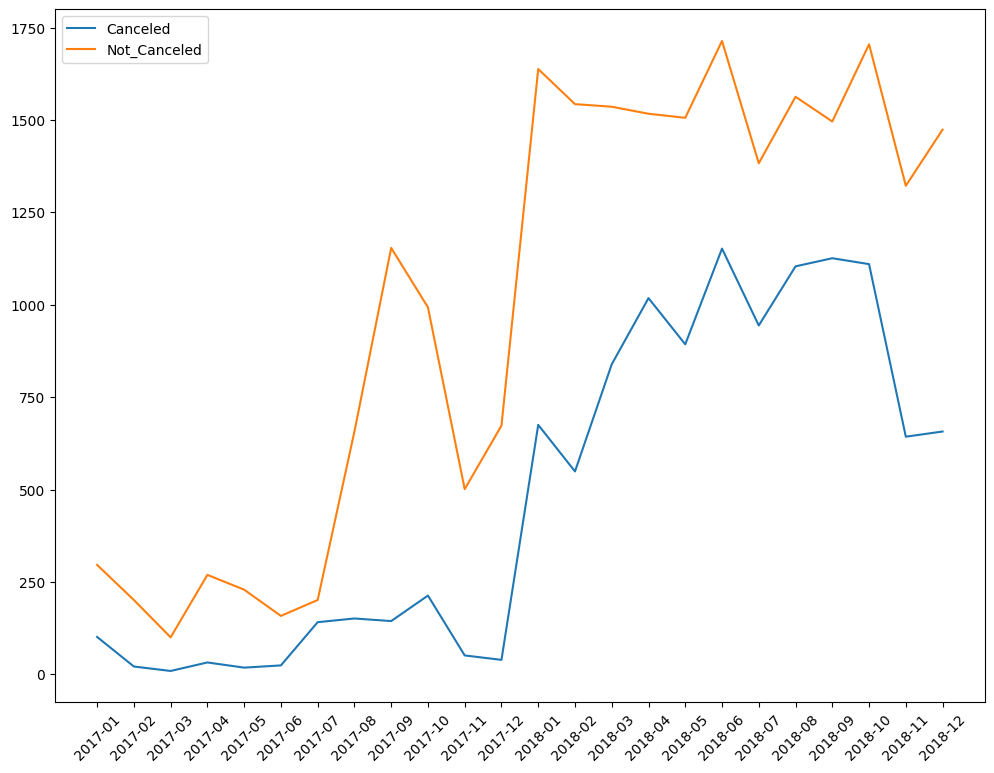

In [107]:
# Visualizing using matplotlib.pyplot package's tools
fig = plt.figure(figsize=(12, 9))
plt.plot(cancel_per_date_df.index, cancel_per_date_df['canceled'], label="Canceled")
plt.plot(cancel_per_date_df.index, not_cancelled_per_date_df['not_canceled'], label="Not_Canceled")
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Spreadsheet and heatmap displaying of cancelation's amount and fraction per month of the year

In [108]:
# Table
df_clean_month = df.loc[df['arrival_month'] != '999']
books_per_date_norm = df_clean_month.groupby('arrival_month')['booking_status'].value_counts(normalize=True)
books_df_per_date_norm = pd.DataFrame(books_per_date_norm)
books_per_date = df_clean_month.groupby('arrival_month')['booking_status'].value_counts()
books_df_per_date = pd.DataFrame(books_per_date)
books_df_per_date['booking_status_normalized'] = books_df_per_date_norm['booking_status']
books_df_per_date

booking_status  booking_status_normalized
arrival_month booking_status                                           
1             Not_Canceled               976                   0.976000
              Canceled                    24                   0.024000
10            Not_Canceled              3389                   0.647003
              Canceled                  1849                   0.352997
11            Not_Canceled              2073                   0.705822
              Canceled                   864                   0.294178
12            Not_Canceled              2583                   0.867652
              Canceled                   394                   0.132348
2             Not_Canceled              1244                   0.745803
              Canceled                   424                   0.254197
3             Not_Canceled              1635                   0.702320
              Canceled                   693                   0.297680
4             Not_Canceled              1716                   0.635556
              Canceled                   984                   0.364444
5             Not_Canceled              1623                   0.633242
              Canceled                   940                   0.366758
6             Not_Canceled              1889                   0.597407
              Canceled                  1273                   0.402593
7             Not_Canceled              1587                   0.549706
              Canceled                  1300                   0.450294
8             Not_Canceled              2292                   0.609412
              Canceled                  1469                   0.390588
9             Not_Canceled              3026                   0.665055
              Canceled                  1524                   0.334945

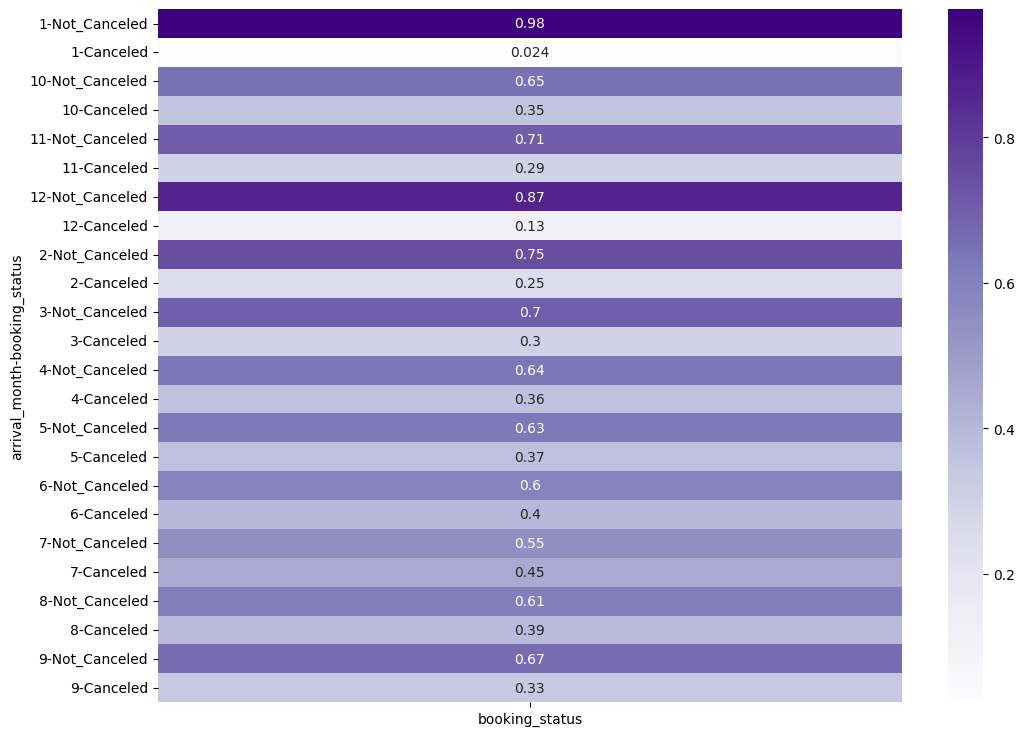

In [109]:
# Graphic
fig = plt.figure(figsize=(12, 9))
date_heat_map = sns.heatmap(data=books_df_per_date_norm, annot=True, cmap="Purples")
plt.show()

### The conclusion for recorded in dataset period
1. **_The proportion of cancelations is quite similar throughout the whole period of observation_**. What is noticeable it's _**the surge in overall number of bookings from the beginning of 2018**_ and **_stable growth together with maintainance of high rate up until November_**. **_The lowest ratio_** of canceled bookings **_was in September and October 2017_**. **_The highest amount and fraction of cancelations are seen during the summer 2018_**.
<br>

### Recommendations based on the studying cancelations each month of the year
2. After parsing months the pattern is obvious: _**as the expected arrival date is closer to the holiday season**_(middle of July) _**as higher the chance of cancelation becomes and vice versa**_. Almost a half of bookings are abolished, in general, during summer. Whereas there are almost no cancelations for January bookings. **The company should expect higher amount of cancelations for bookings made on the period between April and October(escpecially in summer), meanwhile the likelihood of cancelation of a booking made for the period from November to March is low**

------------------------------------------------------------------------------------------------------------------------------------

# ML approach
## Automating the process of spotting potential cancelers

In [110]:
# Import from Scikit-Learn module

from sklearn.ensemble import RandomForestRegressor  # Random forest for regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder 

from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score  # Metrics to use for evaluation

from sklearn.model_selection import  train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [111]:
# Make a copy of the data with no date attributes except arrival month
df_ml = df.drop(columns=['arrival_date', 'arrival_year', 'date', 'year_month'])

# Get months back to nan instead of 999
df_ml['arrival_month'] = df_ml['arrival_month'].replace('999', np.nan)

In [112]:
df_ml.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,11,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,5,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,4,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [113]:
# Initialize a OneHotEncoder object and assign it to ohe
ohe = OneHotEncoder(handle_unknown = 'ignore')

# Fit and transform the data
transformed = ohe.fit_transform(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']])

# Convert binary target variable into numerical representation(canceled = 1, not = 0)
df_ml['booking_status'] = df_ml['booking_status'].map({'Canceled':1, 'Not_Canceled':0})
#df_ml['booking_status'] = df_ml['booking_status'].map({1:'Canceled', 0:'Not_Canceled'})

# Fit and transform the data and Join the columns into the dataframe 
cols_to_trans = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']
for col in cols_to_trans:
# Fit and transform the data
    transformed = ohe.fit_transform(df[[col]])
    df_ml[ohe.categories_[0]] = transformed.toarray()
del df_ml[np.nan]
del df_ml['999']
# Display the first 5 rows
df_ml.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online,1,10,11,12,2,3,4,5,6,7,8,9,999
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,11,Online,0.0,0.0,0.0,106.68,1.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2,Online,0.0,0.0,0.0,60.00,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,5,Online,0.0,0.0,0.0,100.00,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,4,Online,0.0,0.0,0.0,94.50,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#drop NaN values to fit logistic regression model
df_ml_nona = df_ml.dropna()

# Dropping of initial categorical attributes 
cols_to_drop = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']
df_ml_nona.drop(columns = cols_to_drop, axis=1, inplace=True)

# Assure cleaned table's quality by taking random samples and lookin at its shape
display(df_ml_nona.sample(5))
print('Cleaned from null values and prepared for training dataframe contains ' + str(df_ml_nona.shape[0]) + ' rows and ' + str(df_ml_nona.shape[1]) + ' columns')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online,1,10,11,12,2,3,4,5,6,7,8,9,999
20055,2.0,0.0,0.0,4.0,0.0,253.0,0.0,0.0,0.0,90.00,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30041,2.0,0.0,1.0,2.0,0.0,22.0,0.0,0.0,0.0,76.81,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12134,2.0,0.0,2.0,1.0,0.0,22.0,0.0,0.0,0.0,65.75,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34081,2.0,0.0,1.0,4.0,0.0,73.0,0.0,0.0,0.0,79.05,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15434,2.0,0.0,1.0,1.0,0.0,39.0,0.0,0.0,0.0,88.00,2.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cleaned from null values and prepared for training dataframe contains 28266 rows and 41 columns


_*I did not opt the variant with replacing null values with mean or median of the respective column, to preserve the integrity of the model. Additionally, there still are over 30000 clean instances of bookings which more than enough to build a reliable prediction model_

### Preparing and splitting the data

In [115]:
# Defining of target and independent variables
X_data = df_ml_nona.drop(columns = 'booking_status', axis=1)
y_data = df_ml_nona['booking_status']

# Splitting the tables into training and testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# Random Forest Classifier model
_*For feature importance's evaluation later_

In [116]:
# Instantiating Random Forest Regressor object and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [117]:
# Create prediction for our test and train data
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Logistic Regression Model

### Model building

In [118]:
# Instantiating logistic regression object and fitting our data in it
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)

LogisticRegression()

In [119]:
# Predicting whether the booking is fulfilled, using testing data 
Yhat = LogReg.predict(X_test)

In [120]:
# Glancing at the first 15 results
Yhat[:15]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

###  Model Evaluation and Verification

In [121]:
# Calculate r-squared value
print('The r-squared value of our model is ' + str('%.2f'%(LogReg.score(X_test, y_test)*100))+'*')

# Calculate cross-validation score
scores = cross_val_score(LogReg, X_data, y_data, cv=7)
result = np.mean(scores)
print('Cross-validation score is ' + str('%.2f'%(result*100)))

The r-squared value of our model is 80.39*
Cross-validation score is 80.44


_*How to interpret both metrics:_

As closer the r-squared value is to one(maximum value) as more accurately the prediction model fits the actual data. Indeed, the second metric is the same r-squared value or, to say more accurately, mean of 7 different r-squared values calculated by taking the other chunk of target and independent variables' data each time. Cross-calidation score is supposed to decrease the assessment's bias by evaluating the whole population gradually.

Anything higher than 0.8(or 80 in percents) is considered as rigidly good and real-world representing(however, it depends on the industry of application).

In [122]:
# Calculate the mean absolute error
mae_test_lin = mean_absolute_error(y_test,Yhat)
print("Mean absolute error for logistic model is " + str("%.2f"%mae_test_lin))

Mean absolute error for logistic model is 0.20


In [123]:
# Calculate the RMSE
rmse = mean_squared_error(y_test, Yhat, squared= False)
print(f'Root mean squared error is: ' + str("%.2f"%rmse))

Root mean squared error is: 0.44


_There is everything intuitive here: as error is closer to zero as more precise model's output is_

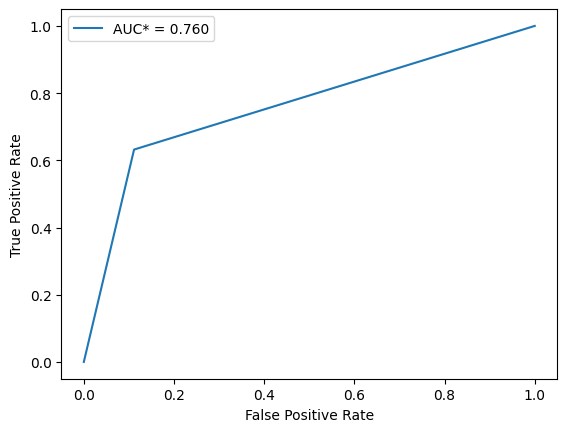

In [124]:
# Evaluation with graphic
fpr, tpr, _ = metrics.roc_curve(y_test, Yhat)
auc = metrics.roc_auc_score(y_test, Yhat)
#create ROC** curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['AUC* = {:.3f}'.format(auc)])
plt.show()

_*AUC = Area Under Curve_

_**ROC = Receiver Operating Characteristic_

How to interperet graphic:
**As closer the curve is to the left upper corner as more accurate the model is.**

### All of the metrics point out that our model is reliable and real-world representing

## Appraisal of each feature's importance

In [125]:
# Feature Importance

# Create a pandas series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

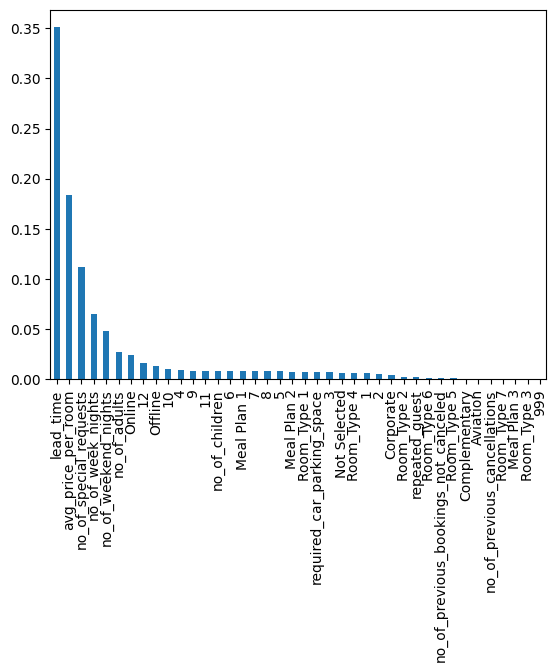

In [126]:
# Plot a bar chart
feature_importances.plot.bar();

Looking at the graph, we can state: 
1. Lead time is obviously the leader in contribution to booking's cancellation's likelihood(_Indeed, it was already clear right after point biserial test_). 

2.   Average price per room, number of special requests, number of week and weekend nights play quite significant role in prediction.

3. All other features' importance is low and descends linearly.  



# Bottom Line

1. We analyzed provided data and turned found insights into descriptive recommendations and actionable advices. 
<br>

2. Based on findings, we have built two diametrically opposite customer personas for better detection of cancelers and reliable bookers in the future.
<br>

3. Using the ML approach, we have built a model which predicts whether a person will cancel the booking, using common attributes input in it. 


_*do not cancel your bookings, the model will find you whatsoever!_